In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
from sklearn.preprocessing import LabelEncoder

### Initial Analysis of Calendar File

In [90]:
# Read in Calendar file
df_calendar = pd.read_csv('/Users/ianforrest/Downloads/m5-forecasting-accuracy/calendar.csv')

# convert NaN values to 'None'; NaN values only contained in event_name_# & event_type_#, where NaN represents 'None'
df_calendar = df_calendar.fillna('None')

# create list of all unique event_names in dataset
event_name_list = set(df_calendar['event_name_1'].unique().tolist() + df_calendar['event_name_2'].unique().tolist())
event_name_list = list(event_name_list)
# convert to dictionary
event_name_dict = {ni: indi for indi, ni in enumerate(set(event_name_list))}
# adjust value of 'None' to be uniform across all 'name' & 'type' columns
event_name_dict['None'] = 0
event_name_dict['LentStart'] = 18
# map to dataframe
df_calendar['event_name_1'] = df_calendar['event_name_1'].map(event_name_dict)
df_calendar['event_name_2'] = df_calendar['event_name_2'].map(event_name_dict)

# create list of all unique event_types in dataset
event_type_list = set(df_calendar['event_type_1'].unique().tolist() + df_calendar['event_type_2'].unique().tolist())
event_type_list = list(event_type_list)
# convert to dictionary
event_type_dict = {ni: indi for indi, ni in enumerate(set(event_type_list))}
# adjust value of 'None' to be uniform across all 'name' & 'type' columns
event_type_dict['None'] = 0
event_type_dict['National'] = 1
# map to dataframe
df_calendar['event_type_1'] = df_calendar['event_type_1'].map(event_type_dict)
df_calendar['event_type_2'] = df_calendar['event_type_2'].map(event_type_dict)

# adjust 'd' column, change name to 'day', remove 'd_' string, and convert to int
df_calendar = df_calendar.rename(columns={"d": "day_total", "wday":"day_of_wk"})
df_calendar['day_total'] = df_calendar['day_total'].str.replace(r'\D', "").astype(int)

# convert category columns to 'category' dtype
category_columns = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'weekday', 'day_of_wk']
for column in category_columns:
    df_calendar[column] = df_calendar[column].astype('category')

# convert 'date' column to datetime
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
# add 'day_of_month' column
df_calendar['day_of_month'] = df_calendar['date'].map(lambda x: x.day)
# create custom data dictionary for day_of_wk column columns
day_dict = {'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4,
            'Thursday':5, 'Friday':6, 'Saturday':7}
# map to dataframe
df_calendar['day_of_wk'] = df_calendar['weekday'].map(day_dict)
# drop 'weekday' column, now contains redundant information
df_calendar = df_calendar.drop(columns = ['weekday'])

# rearrange columns
df_calendar = df_calendar[['date', 'wm_yr_wk', 'day_of_wk', 'day_of_month',
                           'month', 'year', 'day_total', 'event_name_1', 'event_type_1', 'event_name_2',
                           'event_type_2','snap_CA', 'snap_TX', 'snap_WI']]

df_calendar.head()

,date,wm_yr_wk,day_of_wk,day_of_month,month,year,day_total,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,7,29,1,2011,1,0,0,0,0,0,0,0
1,2011-01-30,11101,1,30,1,2011,2,0,0,0,0,0,0,0
2,2011-01-31,11101,2,31,1,2011,3,0,0,0,0,0,0,0
3,2011-02-01,11101,3,1,2,2011,4,0,0,0,0,1,1,0
4,2011-02-02,11101,4,2,2,2011,5,0,0,0,0,1,0,1


In [77]:
event

NameError: name 'event' is not defined

In [55]:
# create dictionary for event_names
event_name_list = df_calendar['event_name_1'].unique() + df_calendar['event_name_2'].unique()
event_name_list

TypeError: unsupported operand type(s) for +: 'Categorical' and 'Categorical'

In [36]:
# check dtypes
df_calendar.dtypes

date            datetime64[ns]
wm_yr_wk                 int64
weekday               category
day_of_wk             category
month                    int64
year                     int64
day                      int64
event_name_1          category
event_type_1          category
event_name_2          category
event_type_2          category
snap_CA                  int64
snap_TX                  int64
snap_WI                  int64
dtype: object

In [37]:
# create custom data dictionary for day_of_wk column columns
day_dict = {'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4,
            'Thursday':5, 'Friday':6, 'Saturday':7}
# map to dataframe
df_calendar['day_of_wk'] = df_calendar['weekday'].map(day_dict)
# drop 'weekday' column, now contains redundant information
df_calendar = df_calendar.drop(columns = ['weekday'])

In [38]:
# create custom dict

,date,wm_yr_wk,day_of_wk,month,year,day,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,7,1,2011,1,None,None,None,None,0,0,0
1,2011-01-30,11101,1,1,2011,2,None,None,None,None,0,0,0
2,2011-01-31,11101,2,1,2011,3,None,None,None,None,0,0,0
3,2011-02-01,11101,3,2,2011,4,None,None,None,None,1,1,0
4,2011-02-02,11101,4,2,2011,5,None,None,None,None,1,0,1


In [ ]:
# convert df_calendar columns to appropriate dtypes
df_calendar = {"event_name_1": "category", "event_name_2": "category", "event_type_1": "category", 
               "event_type_2": "category", "weekday": "category", 'wm_yr_wk': 'int16', "wday": "int16",
               "month": "int16", "year": "int16", "snap_CA": "float32", 'snap_TX': 'float32', 'snap_WI': 'float32' }

category_columns = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'weekday']
for column in columns:
    df_calendar[category_column] = df_calendar[category_column].astype('category')


In [ ]:
# create dictionaries for event_name_# & event_type_#

In [124]:
# encode event columns (to test)
columns = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']

for column in columns:
    df_calendar[column] = df_calendar[column].astype('category')
    df_calendar[column] = df_calendar[column].cat.codes
    
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,19,2,3,1,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,19,2,3,1,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,19,2,3,1,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,19,2,3,1,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,19,2,3,1,1,0,1


In [121]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

t_data = oe.fit_transform(sub_df)

In [122]:
t_data

array([[19.,  2.,  3.,  1.],
       [19.,  2.,  3.,  1.],
       [19.,  2.,  3.,  1.],
       ...,
       [19.,  2.,  3.,  1.],
       [19.,  2.,  3.,  1.],
       [16.,  4.,  2.,  0.]])

### Initial Analysis of Sales_Train_Val File

In [13]:
df_sales_train_val = pd.read_csv('/Users/ianforrest/Downloads/m5-forecasting-accuracy/sales_train_validation.csv')
df_sales_train_val.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [16]:
# create sample subset to view sales history of 20 random items
# units sold per day for 20 items, for 5 years
d_cols = [c for c in df_sales_train_val.columns if 'd_' in c]

twenty_examples = df_sales_train_val.sample(20, random_state=529) \
        .set_index('id')[d_cols] \
    .T \
    .merge(df_calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

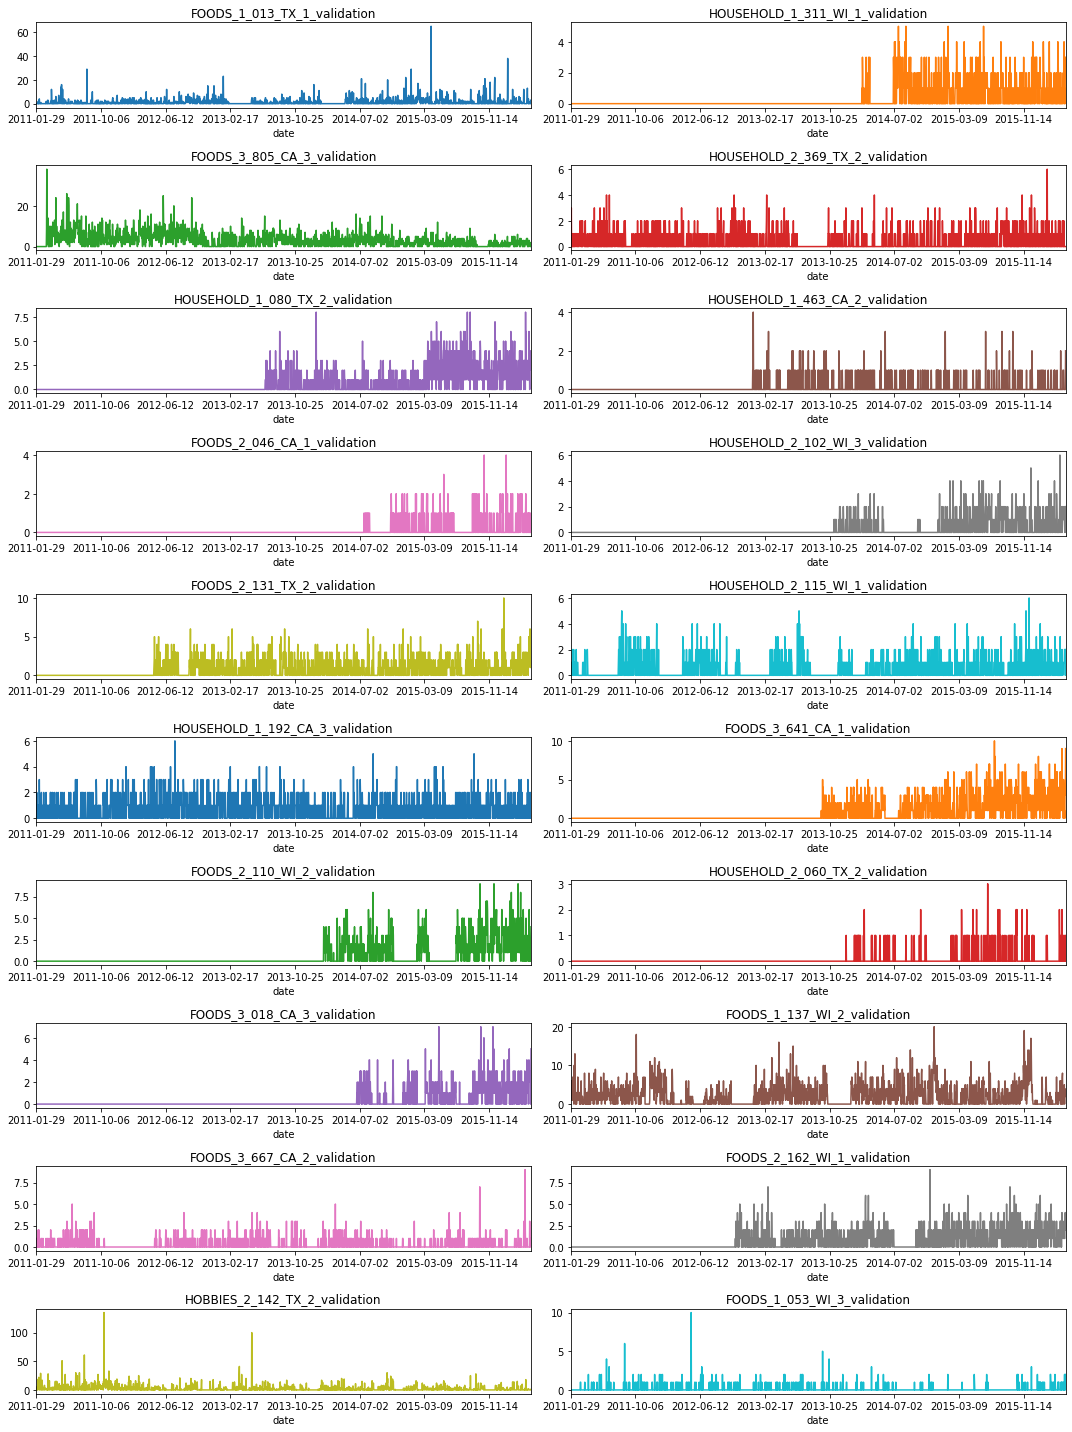

In [18]:
# probably don't want to start at day 1; seems some products did not exist in beginning of dataset
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

In [16]:
df_sales_train_val.shape

(30490, 1919)

#### Initial Analysis of Sample Submission

In [11]:
df_sample_sub = pd.read_csv('/Users/ianforrest/Downloads/m5-forecasting-accuracy/sample_submission.csv')
df_sample_sub.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_sample_sub.shape

(60980, 29)

#### Initial Analysis of Sample Submission

In [8]:
df_sell_prices = pd.read_csv('/Users/ianforrest/Downloads/m5-forecasting-accuracy/sell_prices.csv')
df_sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
